# Introduction

Halo, nama saya Dimas.

# Getting Ready

## Modules Import

In [20]:
import numpy as np                              
import pandas as pd                             
import matplotlib.pyplot as plt                 
from matplotlib import cm
import seaborn as sns                           
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Data Import

In [21]:
import pandas as pd
url = 'https://drive.google.com/file/d/1j79kBhntz5PaizKBPDp03hzPuLgoT-CM/view' 
url = 'https://drive.google.com/uc?id=' +url.split('/')[-2]
df = pd.read_csv(url, parse_dates=["publish_time"])

# Overview

## Heading of Data

In [22]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Describe of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

## Show Row 1

In [ ]:
df.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13 17:13:01+00:00
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966


## Dataset Dimension

In [ ]:
df.shape

(40949, 16)

## Check Missing Data

In [ ]:
# Missing values by column
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

# Data Wrangling

## Remove any unnecessary columns.

In [3]:
# delete column tags
df.drop(columns=['tags'], inplace=True)

# delete column thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, and description
df.drop(columns=['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True)

## Change Column category_id to str Type 

In [4]:
df.category_id = df.category_id.astype(str)

## Fix Missing Values by ' '

In [5]:
# change missing value to ' '
df.fillna(' ', inplace=True)

## Correct Date Format in Column date_trending

In [6]:
# If we look at the trending_date or publish_time columns, we see that they are not yet in the correct format of datetime data.
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518


# Data Visualization

## 10 Videos

### With Lowest Views

In [14]:
low_video = df.groupby('video_id').agg({'title': 'first', 'views': 'max'}).sort_values(by='views', ascending=True).head(10)
low_video

,title,views
video_id,,
y6KYFcta4SE,"1 dead, others injured after Ky. school shooting",559
-JVITToppE0,Coach Taggart Monday Presser Ahead of Arizona,704
dQMZLXaa1L8,Artwork Forge,745
zeQaJGkFyqQ,"Raw: 3 South Carolina Deputies, 1 Officer Shot",748
qg0GdM60syI,Huffy Metaloid Bicycle Commercial 1997,773
tKX8nUCSBjM,Bannon Arrives to Testify on Capitol Hill,835
JNv4w6DFoYs,OjO Commuter Scooter®- Light Electric Vehicle ...,917
TKMXw1YI5S4,UR EEOC Complainants Press Conference (5pm Jan...,988
g3VgrgV3kFk,John Thrasher: Jimbo's here forever,1032


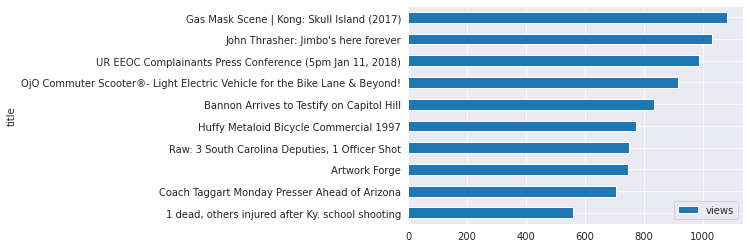

In [15]:
low_video.plot(kind='barh', x='title', y='views')

### With Top Views

In [12]:
best_video = df.groupby('video_id').agg({'title': 'first', 'views': 'max'}).sort_values(by='views', ascending=False).head(10)
best_video

,title,views
video_id,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,225211923
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,148689896
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",139334502
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920
M4ZoCHID9GI,The Weeknd - Call Out My Name (Official Video),122544931
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",102012605
xTlNMmZKwpA,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",94254507
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,91933007


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

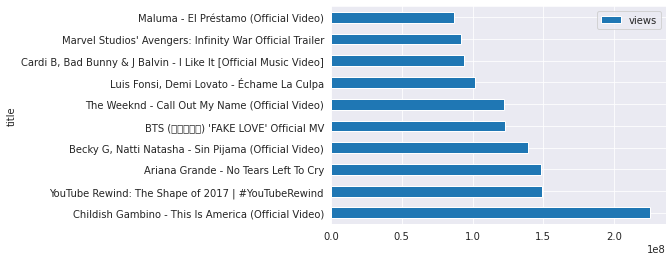

In [13]:
best_video.plot(kind='barh', x='title', y='views')

### With Top Likes

In [16]:
top_likes = df.groupby('video_id').agg({'title': 'first', 'likes': 'max'}).sort_values(by='likes', ascending=False).head(10)
top_likes

,title,likes
video_id,,
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5023450
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3094021
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,3093544
kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,2729292
p8npDG2ulKQ,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800
OK3GJ0WIQ8s,j-hope 'Daydream (백일몽)' MV,2672431
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,2625661
aJOTlE1K90k,Maroon 5 - Girls Like You ft. Cardi B,2488565


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_

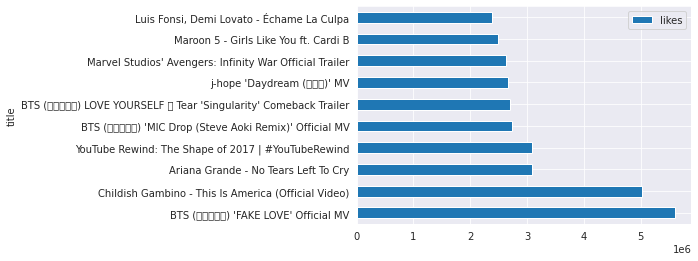

In [17]:
top_likes.plot(kind='barh', x='title', y='likes')

### With Top Dislikes

In [18]:
top_dislikes = df.groupby('video_id').agg({'title': 'first', 'dislikes': 'max'}).sort_values(by='dislikes', ascending=False).head(10)
top_dislikes

,title,dislikes
video_id,,
QwZT7T-TXT0,So Sorry.,1674420
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,1643059
oWjxSkJpxFU,Suicide: Be Here Tomorrow.,497847
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,343541
_5d-sQ7Fh5M,LOGAN PAUL IS BACK!,291900
LFhT6H6pRWg,PSA from Chairman of the FCC Ajit Pai,228426
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,212976
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,206892
V5cOvyDpWfM,Fergie Performs The U.S. National Anthem / 201...,176903


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

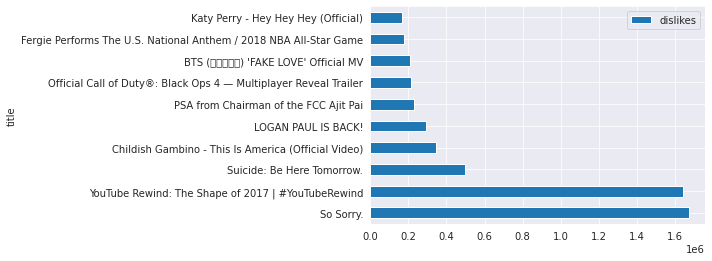

In [19]:
top_dislikes.plot(kind='barh', x='title', y='dislikes')

## Videos that appeared on the trending list the most

In [7]:
# Videos that appeared on the trending list the most days
vid_id_trend_30 = df.groupby('video_id').size().sort_values(ascending=False).head(11)
index = vid_id_trend_30.index
trend_30 = df[df['video_id'].isin(index)].sort_values(by='trending_date', ascending=True).drop_duplicates(subset=['video_id'])
trend_30.sort_values(by='trending_date', ascending=False)

# show trend_30 with column video_id, title, channel_title, and category_id
trend_30[['video_id', 'title', 'channel_title', 'category_id']].head(10)


,video_id,title,channel_title,category_id
33750,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10
33951,WIV3xNz8NoM,Cobra Kai Season 2,Cobra Kai,24
34157,iILJvqrAQ_w,Charlie Puth - BOY [Official Audio],Charlie Puth,10
34350,UfKmSfgFxi8,FORTNITE The Movie (Official Fake Trailer),nigahiga,24
34359,mdWcaWBxxcY,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24
34550,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24
34899,QBL8IRJ5yHU,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26
34909,NBSAQenU2Bk,Rooster Teeth Animated Adventures - Millie So ...,Rooster Teeth,1
34908,r-3iathMo7o,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28
34902,MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10


## What Category have most trending videos?

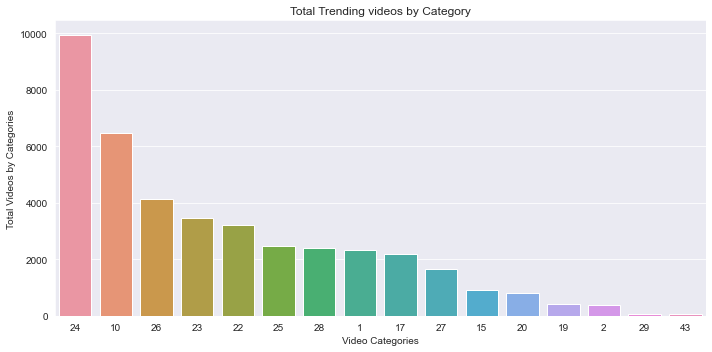

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='category_id',data=df, order=df['category_id'].value_counts().index)
plt.xlabel('Video Categories')
plt.ylabel('Total Videos by Categories')
plt.title('Total videos by Category')

plt.tight_layout()
plt.show()

## Most Reviewed Videos (Likes/Dislikes)

In [10]:
unique_df_title = df.reset_index().groupby('title')['likes','dislikes'].mean()
unique_df_title['total_reviews'] = round(unique_df_title['likes'] + unique_df_title['dislikes'], 2)
unique_df_title = unique_df_title.sort_values(by='total_reviews', ascending=False).head(10)
unique_df_title

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,likes,dislikes,total_reviews
title,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,5.131075e+06,1.706983e+05,5301773.29
Childish Gambino - This Is America (Official Video),3.868033e+06,2.421774e+05,4110210.08
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,2.472672e+06,1.263894e+06,3736565.62
Ariana Grande - No Tears Left To Cry,2.472568e+06,9.389940e+04,2566467.05
So Sorry.,1.213676e+06,1.313220e+06,2526896.00
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,2.484110e+06,3.903214e+04,2523142.14
BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer,2.465552e+06,2.369844e+04,2489250.00
j-hope 'Daydream (백일몽)' MV,2.454092e+06,2.362020e+04,2477712.20
Marvel Studios' Avengers: Infinity War Official Trailer,2.395048e+06,4.471600e+04,2439763.78


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_

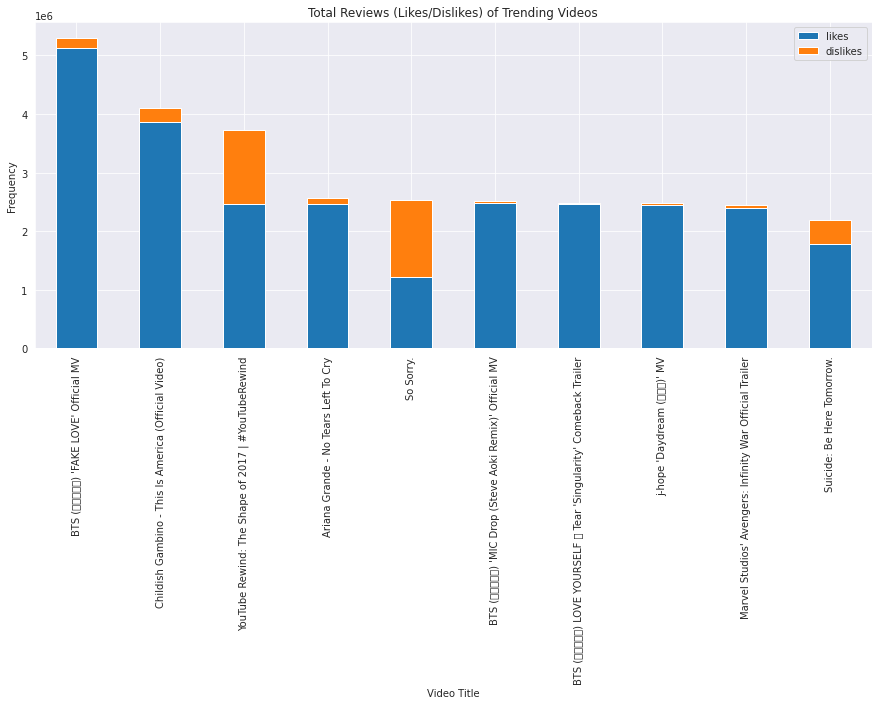

In [11]:
unique_df_title[['likes','dislikes']].plot.bar(stacked=True, figsize=(15,6))
plt.xlabel('Video Title')
plt.ylabel('Frequency')
plt.title('Total Reviews (Likes/Dislikes) of Trending Videos')

plt.show()

## Channel most trending video

Text(0.5, 1.0, 'Channel with Most Trending Videos')

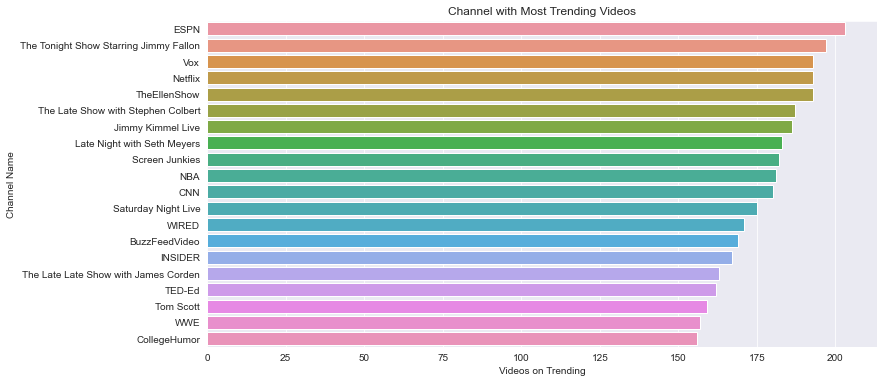

In [ ]:
top10_channels = df.groupby('channel_title')['title'].count().sort_values(ascending=False).head(20)

f = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)
sns.barplot(y=top10_channels.index, x=top10_channels)
plt.xlabel('Videos on Trending')
plt.ylabel('Channel Name')
plt.title('Channel with Most Trending Videos')

## Heat Map

In [ ]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] # only looking at correlations between these variables
corr_matrix = df[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


C:\Users\Dimas\AppData\Local\Temp\ipykernel_2204\1504570241.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
C:\Users\Dimas\AppData\Local\Temp\ipykernel_2204\1504570241.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
C:\Users\Dimas\AppData\Local\Temp\ipykernel_2204\1504570241.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


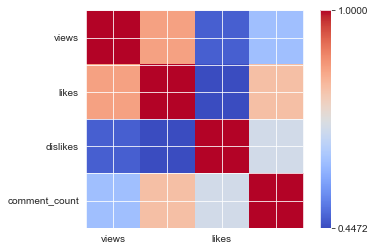

In [ ]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

# Data Processing

## Train Test Split

In [ ]:
# get X: views + likes + dislikes + comment_count
X = df[['views', 'likes', 'dislikes', 'comment_count']]
# get y: category_id
y = df['category_id']

In [ ]:
X

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


In [ ]:
y

0        22
1        24
2        23
3        24
4        24
         ..
40944    15
40945    22
40946    24
40947     1
40948    20
Name: category_id, Length: 40949, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation

## Create KNN

### Check the Best K

Minimum error:- 0.30854700854700856 at K = 0


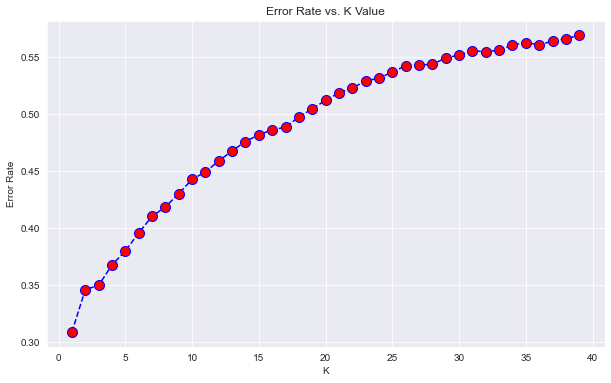

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test, y_test)

0.6543345543345543

In [ ]:
knn.predict(X_test)

array(['10', '10', '10', ..., '20', '10', '23'], dtype=object)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.74      0.62       467
          10       0.62      0.71      0.66      1308
          15       0.46      0.50      0.48       195
          17       0.59      0.73      0.65       417
          19       0.45      0.54      0.49        93
           2       0.54      0.65      0.59        94
          20       0.72      0.80      0.76       169
          22       0.59      0.67      0.63       620
          23       0.64      0.66      0.65       713
          24       0.71      0.66      0.68      1966
          25       0.82      0.67      0.74       457
          26       0.73      0.59      0.65       834
          27       0.74      0.54      0.63       342
          28       0.81      0.55      0.65       495
          29       1.00      0.27      0.43        11
          43       0.89      0.89      0.89         9

    accuracy                           0.65      8190
   macro avg       0.68   